In [1]:
import stanza

# We tested here Stanza, but alternatively we could use Spacy, NLTK, or trankit
# See performance benchmark of these tools here: https://trankit.readthedocs.io/en/latest/performance.html#universal-dependencies-v2-5

See NER entity explanations here: <https://dataknowsall.com/blog/ner.html>

```
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```

In [2]:
stanza.download('en')

2024-09-17 09:56:56 INFO: Downloaded file to /Users/asabuncuoglu/stanza_resources/resources.json
2024-09-17 09:56:56 INFO: Downloading default packages for language: en (English) ...
2024-09-17 09:56:58 INFO: File exists: /Users/asabuncuoglu/stanza_resources/en/default.zip
2024-09-17 09:57:00 INFO: Finished downloading models and saved to /Users/asabuncuoglu/stanza_resources


In [3]:
nlp = stanza.Pipeline('en')

2024-09-17 09:57:00 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-09-17 09:57:00 INFO: Downloaded file to /Users/asabuncuoglu/stanza_resources/resources.json
2024-09-17 09:57:02 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-09-17 09:57:02 INFO: Using device: cpu
2024-09-17 09:57:02 INFO: Loading: tokenize
2024-09-17 09:57:03 INFO: Loading: mwt
2024-09-17 09:57:03 INFO: Loading: pos
2024-09-17 09:57:03 INFO: Loading: lemma
2024-09-17 09:57:03 INFO: Loading: constituency
2024-09-17 09:57:03 INFO: Loading: depparse
2024-09-17 09:57:04 INFO: Loading: sentiment
2024-09-17 09:57:04 INFO: Loading

In [4]:
doc = nlp("new car registrations collapsed by a 'precipitous' 97 percent last month. decline is in line with similar falls across Europe. many showrooms were closed for the coronavirus lockdown. around 1.68 million new cars will be registered in 2020. the lockdown was implemented nationwide on march 23. a strong new car market supports a healthy economy.")
doc

[
  [
    {
      "id": 1,
      "text": "new",
      "lemma": "new",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "head": 3,
      "deprel": "amod",
      "start_char": 0,
      "end_char": 3,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 2,
      "text": "car",
      "lemma": "car",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 3,
      "deprel": "compound",
      "start_char": 4,
      "end_char": 7,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "registrations",
      "lemma": "registration",
      "upos": "NOUN",
      "xpos": "NNS",
      "feats": "Number=Plur",
      "head": 4,
      "deprel": "nsubj",
      "start_char": 8,
      "end_char": 21,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "collapsed",
      "lemma": "collapse",
      "upos": "VERB",
      "xpos"

In [5]:
for ent in doc.ents:
    print(ent.text, ent.type)

97 percent PERCENT
last month DATE
Europe LOC
around 1.68 million CARDINAL
2020 DATE
march 23 DATE


In [2]:
# Load the Indian News dataset and extract entities
import pandas as pd
df = pd.read_csv("../../data/external/indian_news.csv", encoding="utf-8", usecols=["Summary","Sentiment"])
df.head()

,Summary,Sentiment
0,consumer spending plunges 13.6 percent in Apri...,Negative
1,government will have to take a bulk of the tab...,Negative
2,exporters are facing issues in terms of raw ma...,Negative
3,the dollar loses some ground on the safe haven...,Negative
4,six Indian public-sector undertakings have tak...,Negative


In [10]:
"""
The dataset contains news articles and their sentiment. We will extract entities from the news articles using the NER model. It took around 6 hours to extract entities from all the news articles. We saved the entities to a new CSV file.
"""
"""
df["LOC"] = None
df["ORG"] = None
df["LOC_location"] = None
df["ORG_location"] = None

for i, row in df.iterrows():
    doc = nlp(row["Summary"])
    locs = []
    orgs = []
    locs_start = []
    orgs_start = []
    for ent in doc.ents:
        if ent.type == "LOC":
            locs.append(str(ent.text).lower())
            locs_start.append(ent.start_char)
        if ent.type == "ORG":
            orgs.append(str(ent.text).lower())
            orgs_start.append(ent.start_char)
    
    # Add locs and orgs to the dataframe, use | to separate multiple entities
    if len(orgs) > 0:
        df.at[i, "ORG"] = str(orgs).replace("[","").replace("]","").replace("'","").replace(",","|")
        df.at[i, "ORG_location"] = str(orgs_start).replace("[","").replace("]","").replace("'","").replace(",","|")
    if len(locs) > 0:
        df.at[i, "LOC"] = str(locs).replace("[","").replace("]","").replace("'","").replace(",","|")
        df.at[i, "LOC_location"] = str(locs_start).replace("[","").replace("]","").replace("'","").replace(",","|")

    if (i+1) % 100 == 0:
        print(f"{i+1} news processed")
        #save the dataframe to a csv file
        df.to_csv("../data/processed/indian_news_entities.csv", index=False)
"""

100 news processed
200 news processed
300 news processed
400 news processed
500 news processed
600 news processed
700 news processed
800 news processed
900 news processed
1000 news processed
1100 news processed
1200 news processed
1300 news processed
1400 news processed
1500 news processed
1600 news processed
1700 news processed
1800 news processed
1900 news processed
2000 news processed
2100 news processed
2200 news processed
2300 news processed
2400 news processed
2500 news processed
2600 news processed
2700 news processed
2800 news processed
2900 news processed
3000 news processed
3100 news processed
3200 news processed
3300 news processed
3400 news processed
3500 news processed
3600 news processed
3700 news processed
3800 news processed
3900 news processed
4000 news processed
4100 news processed
4200 news processed
4300 news processed
4400 news processed
4500 news processed
4600 news processed
4700 news processed
4800 news processed
4900 news processed
5000 news processed
5100 news

In [3]:
df = pd.read_csv("../../data/processed/indian_news_entities.csv", encoding="utf-8")
df.head()

,Summary,Sentiment,LOC,ORG,LOC_location,ORG_location
0,consumer spending plunges 13.6 percent in Apri...,Negative,NaN,reuters,NaN,224
1,government will have to take a bulk of the tab...,Negative,NaN,the reserve bank,NaN,327
2,exporters are facing issues in terms of raw ma...,Negative,NaN,NaN,NaN,NaN
3,the dollar loses some ground on the safe haven...,Negative,NaN,NaN,NaN,NaN
4,six Indian public-sector undertakings have tak...,Negative,NaN,NaN,NaN,NaN


In [4]:
# get all the values of no None LOC and ORG
locs = df["LOC"].dropna().values
orgs = df["ORG"].dropna().values

locs = [loc.split("|") for loc in locs]
locs = [item for sublist in locs for item in sublist]
locs = list(set(locs))
print(locs)

orgs = [org.split("|") for org in orgs]
orgs = [item for sublist in orgs for item in sublist]
orgs = list(set(orgs))
print(orgs)

[' middle east', 'middle east', ' green zone', ' asia-pacific japan', 'the caspian sea', 'pacific', 'gangetic', 'greater noida', 'northeast region', ' asia', 'ayushman pakhwaras', 'renaissance', 'americas', '"indias southwest coast"', ' "west bengals it"', 'goldilocks', 'north korea’s', '"asias"', 'north america’s', 'southeast asia', ' southeast asia', 'indo-pacific', 'antarctica', 'union territories', 'kharif', 'east', ' north america', ' central', 'north east india', 'the asia pacific', 'asia', 'middle-east', ' covid', '"ladakhs galwan valley"', 'south korea.', ' pacific', ' red zones', ' the bengal basin', 'south america', 'gulf', 'asia-pacific & japan', 'ganges', 'asia-pacific', 'lower zakum', 'the 10220-10230 zone', 'the north east', 'the uber elevate asia pacific expo.', 'indo-bangladesh', ' greater noida', ' south asia', ' north-west', 'himalayan', 'sub-saharan africa', 'silicon valley', 'africa', 'the persian gulf', 'south asia’s', ' the ravi river', 'greater noida’s', 'ge’s so

In [16]:
indian_entities = pd.read_csv("../../data/output/indian/indian_entities.csv", encoding="utf-8")

In [17]:
indian_entities = indian_entities[indian_entities["is_india"] == 1]
print(len(indian_entities))
indian_entities.head()

1974


,entity,description,is_india
0,Glucon D,Zydus Wellness A popular glucose-based energy...,1.0
1,Kotak Mah,Kotak Mahindra Bank is a leading Indian privat...,1.0
2,Railways,Refers to Indian Railways,1.0
3,Hindustan Petroleum Corporation,A state-owned oil and natural gas company in I...,1.0
4,LXME,India’s first financial platform designed for ...,1.0


In [18]:
ents = indian_entities["entity"].values
ents = [ent.lower() for ent in ents]

org_indices = df[df["ORG"].apply(lambda x: any(ent in x for ent in ents) if pd.notna(x) else False)].index
print(org_indices)

Index([    1,     7,     8,    10,    13,    16,    17,    19,    21,    26,
       ...
       26887, 26888, 26889, 26890, 26891, 26892, 26893, 26896, 26897, 26899],
      dtype='int64', length=11408)


In [19]:
len(org_indices)

11408

In [20]:
predictions = pd.read_csv("../../data/output/indian/predictions.csv", encoding="utf-8")
predictions.head()

,y_true,y_pred
0,Negative,Negative
1,Negative,Neutral
2,Negative,Negative
3,Negative,Negative
4,Negative,Neutral


In [21]:
indian_predictions = predictions.loc[org_indices]
other_predictions = predictions.drop(org_indices)

In [22]:
print(len(indian_predictions))
print(len(other_predictions))

# create a new prediction df with a new column "is_india" and include all predictions
indian_predictions["is_india"] = 1
other_predictions["is_india"] = 0
pred_df = pd.concat([indian_predictions, other_predictions])

11408
15553


In [26]:
pred_df.head()

,y_true,y_pred,is_india
1,Negative,Neutral,1
7,Negative,Negative,1
8,Negative,Negative,1
10,Negative,Negative,1
13,Negative,Positive,1


In [27]:
pred_df.tail()

,y_true,y_pred,is_india
26956,Positive,Positive,0
26957,Positive,Positive,0
26958,Positive,Positive,0
26959,Positive,Positive,0
26960,Positive,Neutral,0


In [28]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, \
                              false_positive_rate, \
                              selection_rate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
y_true = pred_df["y_true"].map({"Positive": 1, "Negative": -1})
y_pred = pred_df["y_pred"].map({"Positive": 1, "Negative":-1})
sf_data = pred_df["is_india"]

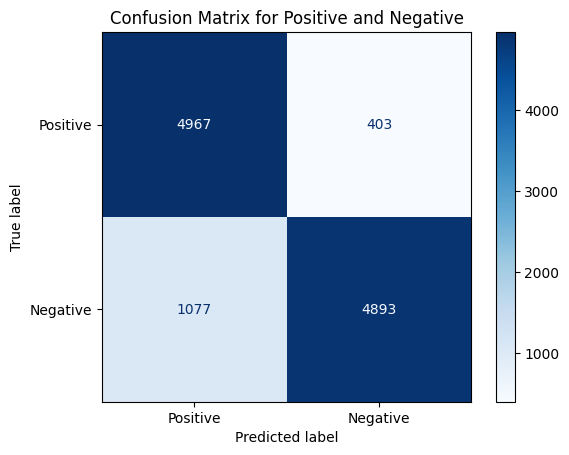

In [30]:
nan_locations = y_pred[y_pred.isna()].index
y_pred = y_pred.drop(nan_locations)
y_true = y_true.drop(nan_locations)
sf_data = sf_data.drop(nan_locations)

nan_locations = y_true[y_true.isna()].index
y_pred = y_pred.drop(nan_locations)
y_true = y_true.drop(nan_locations)
sf_data = sf_data.drop(nan_locations)

cm = confusion_matrix(y_true, y_pred, labels=[1,-1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Positive and Negative')
plt.show()

In [31]:
# Define a custom recall function with average='macro' and pos_label='positive'
def recall_macro(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro')

# Construct a function dictionary
my_metrics = {
    'tpr' : recall_macro,
    'fpr' : false_positive_rate,
    'sel' : selection_rate,
    'count' : count
}

# Construct a MetricFrame
mf = MetricFrame(
    metrics=my_metrics,
    y_true=y_true,
    y_pred=y_pred,
    sensitive_features=sf_data,
)

In [32]:
mf.by_group

,tpr,fpr,sel,count
is_india,,,,
0,0.865665,0.188157,0.494186,6708.0
1,0.882580,0.165781,0.589162,4632.0


In [41]:
mf.overall

tpr          0.872276
fpr          0.180402
sel          0.532981
count    11340.000000
dtype: float64

In [33]:
from fairlearn.metrics import demographic_parity_ratio
from fairlearn.metrics import equalized_odds_ratio

In [35]:
print(mf.group_min())


tpr      0.865665
fpr      0.165781
sel      0.494186
count      4632.0
dtype: object


In [36]:
print(mf.group_max())


tpr       0.88258
fpr      0.188157
sel      0.589162
count      6708.0
dtype: object


In [37]:
print(mf.difference())


tpr         0.016915
fpr         0.022376
sel         0.094976
count    2076.000000
dtype: float64


In [38]:
print(mf.ratio())


tpr      0.980835
fpr      0.881076
sel      0.838794
count    0.690519
dtype: float64


In [40]:
print(mf.difference(method='to_overall'))


tpr         0.010304
fpr         0.014621
sel         0.056182
count    6708.000000
dtype: float64


In [41]:
print(mf.ratio(method='to_overall'))


tpr      0.988325
fpr      0.918951
sel      0.904641
count    0.408466
dtype: float64


In [42]:
print(demographic_parity_ratio(y_true,
                               y_pred,
                               sensitive_features=sf_data))


0.8387943449768636


In [43]:
print(equalized_odds_ratio(y_true,
                               y_pred,
                               sensitive_features=sf_data))


0.8810763008627422


In [44]:
print(min(mf.ratio(method="between_groups")))

0.6905187835420393
